In [1]:
from mlflow.tracking.client import MlflowClient
from mlflow.entities import ViewType
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import mlflow
import os
from pathlib import Path
from cai_robustness_metrics.metrics.confidence_calibration import ConfidenceCalibration as ECE
from scipy.special import softmax
sns.set(color_codes=True)
%matplotlib inline

WP = "params.quantization/weight_precision"
AP = "params.quantization/activation_precision"


In [23]:
NAME = 'RESNET GTSRB'
EXP_ID = '27'
FILE = 'q_preds.csv'
TYPE = 'ECE' # ECE, CONFIDENCE

mlflow.set_tracking_uri("file:/data/logs/kristian/mlruns")
df_runs = mlflow.search_runs(
    experiment_ids=EXP_ID,
    filter_string="tags.type = 'quantization'",
    output_format="pandas"
)

runs = df_runs[df_runs[AP] == '7']
# runs = df_runs

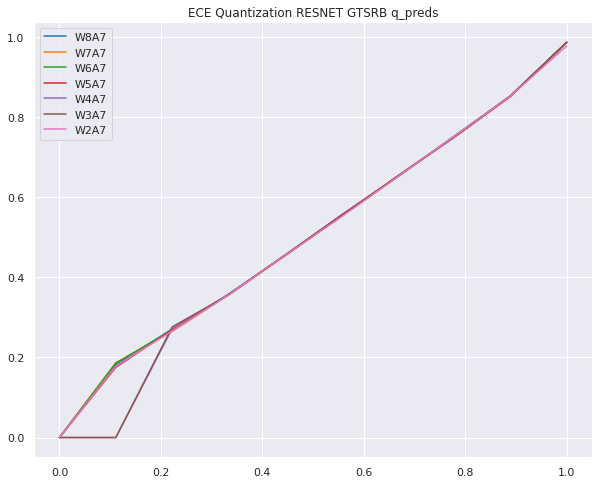

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set_palette("tab10")
plt.title(f"{TYPE} Quantization {NAME} {FILE.removesuffix('.csv')}")

for i in range(len(runs)):
    run = runs.iloc[i]
    path = run["params.csv_path"]
    ap = run[AP]
    wp = run[WP]
    df = pd.read_csv(path + f"/{FILE}")

    preds = df.iloc[:,0:10].to_numpy()
    preds = softmax(preds, axis=1)
    targs = df['targets'].to_numpy()

    ece = ECE(preds, targs, n_bins=10)
    accuracies, mean_confidences = ece.get_calibration()

    if TYPE == 'ECE':
        sns.lineplot(x=np.linspace(0, 1, 10), y=mean_confidences, label=f"W{wp}A{ap}", markers=True)
    elif TYPE == 'CONFIDENCE':
        sns.lineplot(x=np.linspace(0, 1, 10), y=accuracies, label=f"W{wp}A{ap}")

#plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), 'g')
plt.savefig(f"/home/k.schwienbacher/quantization-robustness/data/A_gtsrb/ece/{NAME}-{FILE.removesuffix('.csv')}A{ap}W{wp}.jpg")


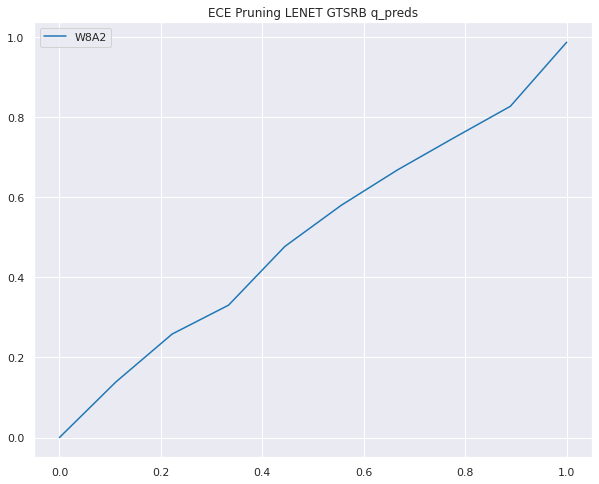

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set_palette("tab10")
plt.title(f"{TYPE} Pruning {NAME} {FILE.removesuffix('.csv')}")

run = runs.iloc[6]
path = run["params.csv_path"]
df = pd.read_csv(path + f"/{FILE}")


preds = df.iloc[:,0:10].to_numpy()
preds = softmax(preds, axis=1)
targs = df['targets'].to_numpy()

ece = ECE(preds, targs, n_bins=10)
accuracies, mean_confidences = ece.get_calibration()

if TYPE == 'ECE':
    sns.lineplot(x=np.linspace(0, 1, 10), y=mean_confidences, label=f"W{wp}A{ap}", markers=True)
elif TYPE == 'CONFIDENCE':
    sns.lineplot(x=np.linspace(0, 1, 10), y=accuracies, label=f"W{wp}A{ap}")

#plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), 'g')
#plt.savefig(f"/home/k.schwienbacher/quantization-robustness/data/ece/{NAME}-{FILE.removesuffix('.csv')}A{ap}W{wp}.jpg")


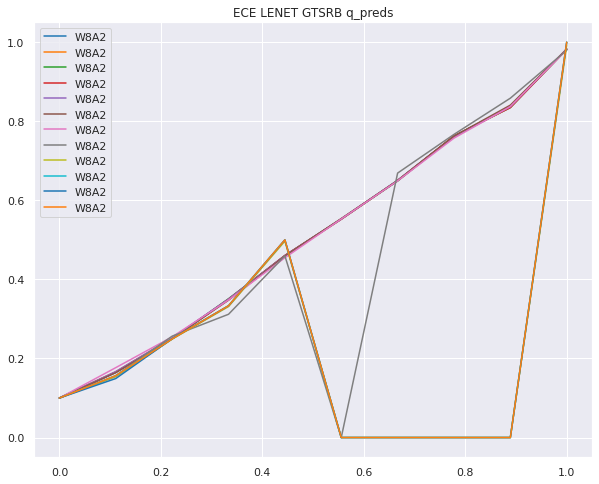

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set_palette("tab10")
plt.title(f"{TYPE} {NAME} {FILE.removesuffix('.csv')}")

for i in range(len(runs)):
    run = runs.iloc[i]
    path = run["params.csv_path"]
    df = pd.read_csv(path + f"/{FILE}")

    preds = df.iloc[:,0:10].to_numpy()
    preds = softmax(preds, axis=1)
    targs = df['targets'].to_numpy()

    ece = ECE(preds, targs, n_bins=10)
    accuracies, mean_confidences = ece.get_calibration()

    if TYPE == 'ECE':
        sns.lineplot(x=np.linspace(0, 1, 10), y=mean_confidences, label=f"W{wp}A{ap}", markers=True)
    elif TYPE == 'CONFIDENCE':
        sns.lineplot(x=np.linspace(0, 1, 10), y=accuracies, label=f"W{wp}A{ap}")
    

#plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), 'g')
#plt.savefig(f"/home/k.schwienbacher/quantization-robustness/data/ece/{NAME}-{FILE.removesuffix('.csv')}A{ap}W{wp}.jpg")
